### SETUP & IMPORTS

In [ ]:
# import required libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

!pip install logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 50.9 MB/s eta 0:00:00


In [ ]:
# Import files
from google.colab import files
uploaded = files.upload()

Saving positive.tsv to positive.tsv
Saving negative.tsv to negative.tsv
Saving pos_train.tsv to pos_train.tsv
Saving pos_bench.tsv to pos_bench.tsv
Saving neg_bench.tsv to neg_bench.tsv
Saving neg_train.tsv to neg_train.tsv


In [ ]:
# Create a directory for the plots
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

### DATA PREPARATION AND LABELING

Load the positive and negative datasets (training and benchmark) from TSV files to DataFrames, merge them, and assign class labels based on the presence of the Signal Peptide (SP) cleavage site.

In [ ]:
# Load the TSV file into a DataFrame
pos_train = pd.read_csv('pos_train.tsv', sep='\t')
neg_train = pd.read_csv('neg_train.tsv', sep='\t')
pos_bench = pd.read_csv('pos_bench.tsv', sep='\t')
neg_bench = pd.read_csv('neg_bench.tsv', sep='\t')

# Merge positive and negative sets and assign labels based on the presence of SP cleavage
train_df = pd.concat([pos_train, neg_train], axis=0)
train_df['class'] = train_df['SP cleavage'].isna()
train_df['class'] = train_df['class'].replace({True: 'Negative', False: 'Positive'})
bench_df = pd.concat([pos_bench, neg_bench], axis=0)
bench_df['class'] = bench_df['SP cleavage'].isna()
bench_df['class'] = bench_df['class'].replace({True: 'Negative', False: 'Positive'})

# Display the first few rows of the DataFrame
print(pos_train.head())
print(neg_train.head())
print(pos_bench.head())
print(neg_bench.head())
print(bench_df.tail())


   seq_id     class           Organism  Kingdom  Sequence length  SP cleavage  \
0  P13598  positive       Homo sapiens  Metazoa              275           24   
1  Q96HE7  positive       Homo sapiens  Metazoa              468           23   
2  Q13651  positive       Homo sapiens  Metazoa              578           21   
3  P04937  positive  Rattus norvegicus  Metazoa             2477           24   
4  P68248  positive      Gallus gallus  Metazoa               80           25   

   fold  
0     1  
1     2  
2     3  
3     4  
4     5  
   seq_id     class                                           Organism  \
0  Q12139  negative  Saccharomyces cerevisiae (strain ATCC 204508 /...   
1  P28350  negative  Neurospora crassa (strain ATCC 24698 / 74-OR23...   
2  D4A1X2  negative                                  Rattus norvegicus   
3  P40532  negative  Saccharomyces cerevisiae (strain ATCC 204508 /...   
4  Q9P6S5  negative  Schizosaccharomyces pombe (strain 972 / ATCC 2...   

   Kingd

### SEQUENCE LENGTH DISTRIBUTION

Explore and compare sequence length distributions across the datasets to understand their characteristics using both histograms and boxplots for the training and benchmark sets. This allows to visualize the distribution of sequence lengths and compare positive and negative classes.

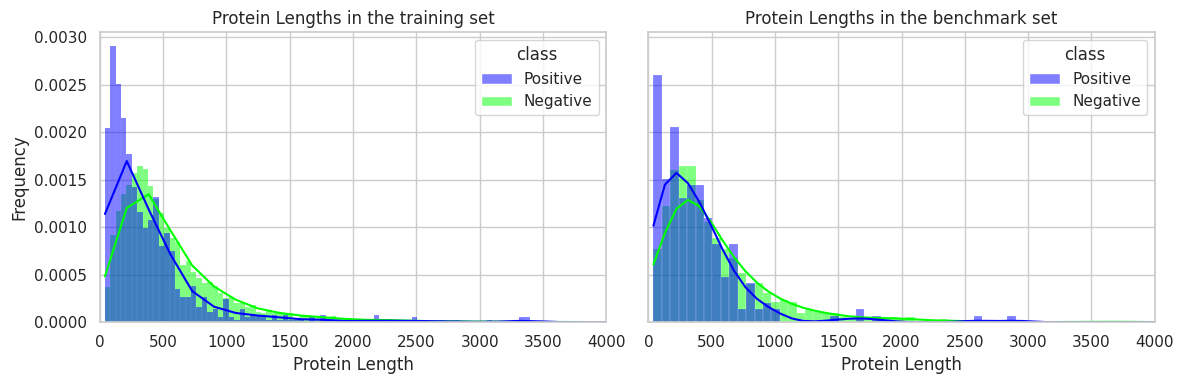

In [ ]:
# Set the colors of the plots
custom_palette=['blue','lime','cyan','pink','purple','magenta', '#7FFFD4', '#550A35']

# Set the style of the plots
sns.set(style="whitegrid")

# Create two subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Training set
sns.histplot(train_df, kde=True, x='Sequence length', hue='class', stat='density', common_norm=False, palette=custom_palette[:2], ax=axes[0])
#stat=density --> per normalizzare i dati otherwise not comparable

# Add title and labels
axes[0].set_title('Protein Lengths in the training set')
axes[0].set_xlabel('Protein Length')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 4000) #to see a good graph and avoid displaying very long neg proteins

# Benchmark set
sns.histplot(bench_df, kde=True, x='Sequence length', hue='class', stat='density', common_norm=False, palette=custom_palette[:2], ax=axes[1])

# Add title and labels
axes[1].set_title('Protein Lengths in the benchmark set')
axes[1].set_xlabel('Protein Length')
axes[1].set_ylabel('')
axes[1].set_xlim(0, 4000)

# Save and show the plot
fig.savefig(os.path.join(output_dir, "density_protein_lengths.png"), dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

plt.close(fig)

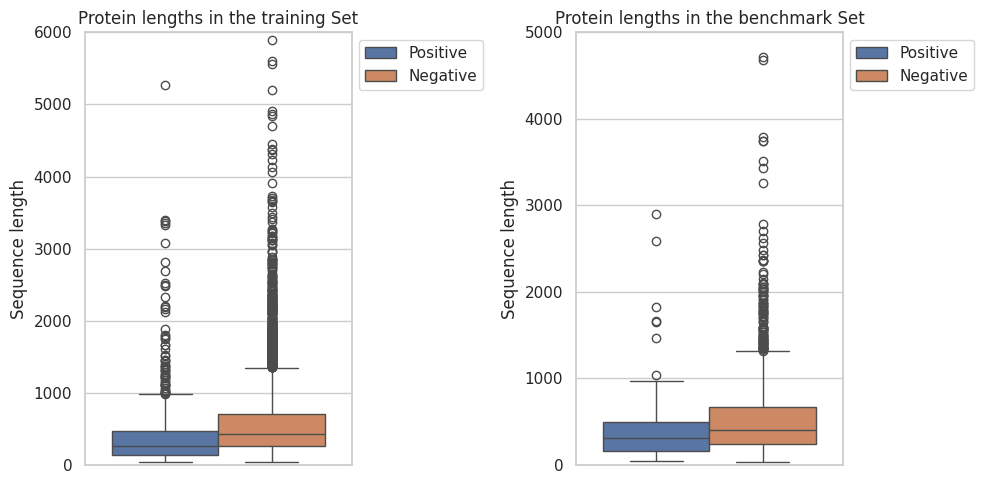

In [ ]:
# Boxplots of protein lengths
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Training set
sns.boxplot(y='Sequence length', hue='class', data=train_df, ax=axes[0])
axes[0].set_title('Protein lengths in the training Set')
axes[0].set_ylim(0, 6000)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Benchmark set
sns.boxplot(y='Sequence length', hue='class', data=bench_df, ax=axes[1])
axes[1].set_title('Protein lengths in the benchmark Set')
axes[1].set_ylim(0, 5000)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save and show the plot
fig.savefig(os.path.join(output_dir, "boxplot_protein_length.png"), dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

plt.close(fig)

In [ ]:
# Combine all positive sets
df_sp_l = pd.concat([pos_train, pos_bench], axis=0)

# Label the merged set with Training/Benchmark based on 'fold' column
df_sp_l['class']=df_sp_l['fold'].isna()
df_sp_l['class']=df_sp_l['class'].replace({True: 'Benchmark', False: 'Training'})

### Signal Peptide (SP) Length Distribution
The plot displays the distribution of SP lengths in the **training** and **benchmark** datasets.  
> - Both sets follow a similar pattern, with most SPs ranging between **18–25** amino acids.  
> -   The overlap confirms that the benchmark is consistent with the training data, with no bias introduced during splitting and highlights the first ~30 residues as the region where predictors should focus for reliable model evaluation.

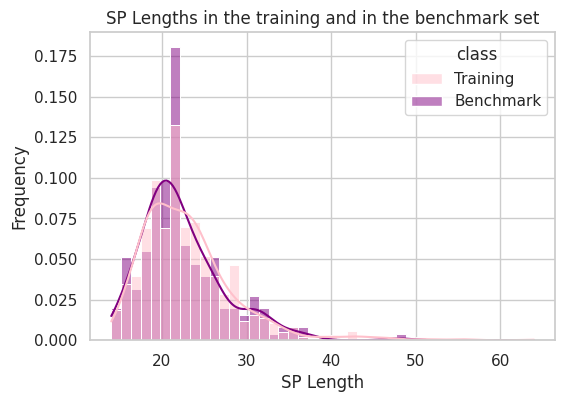

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of protein lengths
plt.figure(figsize=(6, 4))
sns.histplot(df_sp_l, kde=True, stat='density', common_norm=False, x='SP cleavage', hue='class', palette=custom_palette[3:5] )

# Add title and labels
plt.title('SP Lengths in the training and in the benchmark set')
plt.xlabel('SP Length')
plt.ylabel('Frequency')


fig.savefig(os.path.join(output_dir, "SP_lengths.png"), dpi=300, bbox_inches="tight")
plt.show()

plt.close(fig)

## Amino Acid Composition
> In this step, the amino acid composition of signal peptides in the **training** and **benchmark** sets is compared with the global **SwissProt** reference (https://web.expasy.org/docs/relnotes/relstat.html). This analysis is important because signal peptides display specific compositional biases: they are typically enriched in hydrophobic residues within the H-region and often contain small residues near the cleavage sites. Capturing these patterns helps to highlight the distinctive profile of SPs while ensuring that the datasets are consistent and suitable for model development.  

The workflow is divided into three main parts:  
1. **Extraction** of SP subsequences from the positive dataset  
2. **Calculation** of amino acid frequencies and conversion into percentages  
3. **Visualize** amino acid composition with a comparative barplot



## 1. Extraction of SP subsequences

In [ ]:
uploaded = files.upload()

Saving positive.fasta to positive.fasta
Saving negative.fasta to negative.fasta


In [ ]:
# Retrieve the SP sequences for the train and for the bench

with open('positive.fasta', 'r') as read:
  with open('train_SP.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = pos_train.query("seq_id == @line")['SP cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[:end+1], file=write)
  write.close
read.close

with open('positive.fasta', 'r') as read:
  with open('bench_SP.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = pos_bench.query("seq_id == @line")['SP cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[:end+1], file=write)
  write.close
read.close

<function TextIOWrapper.close()>

## 2. Calculation of amino acid frequencies and conversion into percentages

In [ ]:
aa_train = {}
tot = 0

with open("train_SP.seq", "r") as file:
    for line in file:
        line = line.rstrip()
        for char in line:
            tot += 1
            aa_train[char] = aa_train.get(char, 0) + 1

# Calculate percentages after counting all residues
for k in aa_train.keys():
    aa_train[k] = round((aa_train[k] / tot) * 100, 2)

print(tot)       # Total residues
print(aa_train)  # Dictionary with percentages


20996
{'M': 6.1, 'G': 6.2, 'L': 21.31, 'Q': 2.26, 'T': 4.47, 'K': 2.32, 'W': 1.79, 'P': 4.02, 'S': 7.4, 'H': 1.16, 'A': 14.19, 'F': 4.81, 'I': 4.62, 'Y': 1.16, 'V': 8.22, 'C': 2.86, 'R': 3.34, 'N': 1.08, 'E': 1.6, 'D': 1.09}


**Training set (20,996 residues)**: Enriched in hydrophobic residues, mainly leucine and alanine; charged residues are rare.

In [ ]:
aa_bench = {}
tot = 0

with open("bench_SP.seq", "r") as file:
    for line in file:
        line = line.rstrip()
        for char in line:
            tot += 1
            aa_bench[char] = aa_bench.get(char, 0) + 1

# Calculate percentages after counting all residues
for k in aa_bench.keys():
    aa_bench[k] = round((aa_bench[k] / tot) * 100, 2)

print(tot)       # Total residues
print(aa_bench)  # Dictionary with percentages

5119
{'M': 6.21, 'A': 15.02, 'G': 5.41, 'L': 21.94, 'S': 8.03, 'R': 2.95, 'T': 4.53, 'V': 7.77, 'P': 3.63, 'W': 1.58, 'F': 5.49, 'H': 1.27, 'D': 1.17, 'I': 3.91, 'Q': 2.34, 'K': 2.25, 'C': 2.77, 'E': 1.6, 'N': 1.04, 'Y': 0.88, 'X': 0.2}


**Benchmark set (5,119 residues):** Very similar profile, with leucine and alanine most frequent and few charged residues.

## 3. Visualization through a comparative barplot
The barplot confirms that training and benchmark share the same composition profile, with no bias from dataset splitting. When compared to SwissProt, signal peptides stand out for a clear enrichment in hydrophobic residues (notably leucine and alanine) and a depletion of several polar and charged residues, consistent with their structural role.

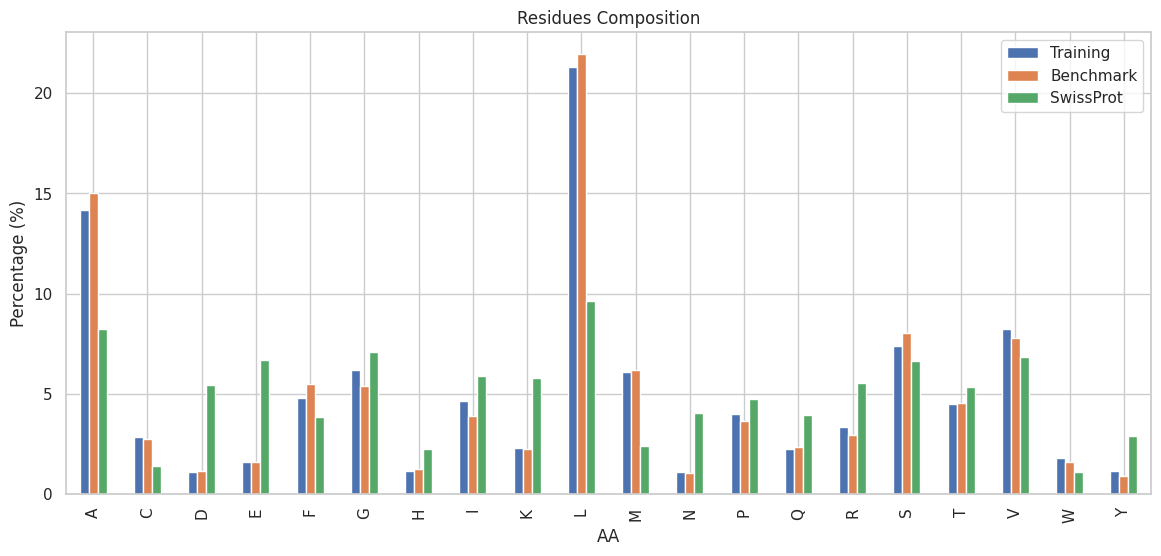

In [ ]:
# Official SwissProt dictionary (from Expasy)
aa_swissprot = {
    'A': 8.25, 'C': 1.38, 'D': 5.46, 'E': 6.71, 'F': 3.86,
    'G': 7.07, 'H': 2.27, 'I': 5.90, 'K': 5.79, 'L': 9.64,
    'M': 2.41, 'N': 4.06, 'P': 4.74, 'Q': 3.93, 'R': 5.52,
    'S': 6.65, 'T': 5.36, 'V': 6.85, 'W': 1.10, 'Y': 2.92
}

# Store in a DataFrame
aa_order = list(aa_swissprot.keys())  # standard AA order
df = pd.DataFrame({
    'AA': aa_order,
    'Training': [aa_train.get(k, 0) for k in aa_order],
    'Benchmark': [aa_bench.get(k, 0) for k in aa_order],
    'SwissProt': [aa_swissprot[k] for k in aa_order]
})

# Generate the plot
df.set_index('AA').plot(kind='bar', figsize=(14,6))
plt.ylabel("Percentage (%)")
plt.title("Residues Composition")
plt.legend()


fig.savefig(os.path.join(output_dir, "residues_composition.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)


## Taxonomic classification:
- Sequences are annotated by taxonomic origin at both kingdom and species level.  
- Checks that no group is disproportionately represented, preventing biases.  




## Classification at Kingdom level

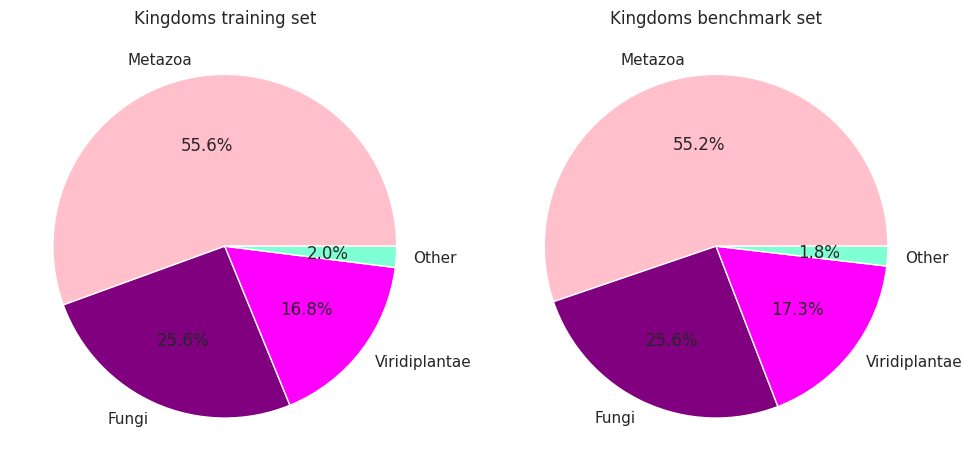

In [ ]:
king_train = train_df['Kingdom'].value_counts()
king_bench = bench_df['Kingdom'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Training set pie chart
king_train.plot.pie(
    autopct='%1.1f%%',
    ax=axes[0],
    title='Kingdoms training set',
    colors=custom_palette[3:]
)
axes[0].set_ylabel('')

# Benchmark set pie chart
king_bench.plot.pie(
    autopct='%1.1f%%',
    ax=axes[1],
    title='Kingdoms benchmark set',
    colors=custom_palette[3:]
)
axes[1].set_ylabel('')

plt.tight_layout()

fig.savefig(os.path.join(output_dir, "kingdom_pie.png"), dpi=300, bbox_inches="tight")
plt.show()

plt.close(fig)

Both charts show a similar distribution: Metazoa (55%) dominate, followed by Fungi (26%) and Viridiplantae (17%), with few sequences in other groups. This confirms a balanced and consistent taxonomic composition.

## Classification at species level

In [ ]:
species_train = train_df['Organism'].value_counts()
species_bench = bench_df['Organism'].value_counts()

# Select the top 10 elements
train_plot = species_train.head(7)
bench_plot = species_bench.head(7)

# Group the remaining elements into 'Others'
other_train = sum(species_train[7:])
other_bench =sum(species_bench[7:])
result_train = pd.concat([train_plot, pd.Series({'Others': other_train})])
result_bench = pd.concat([bench_plot, pd.Series({'Others': other_bench})])

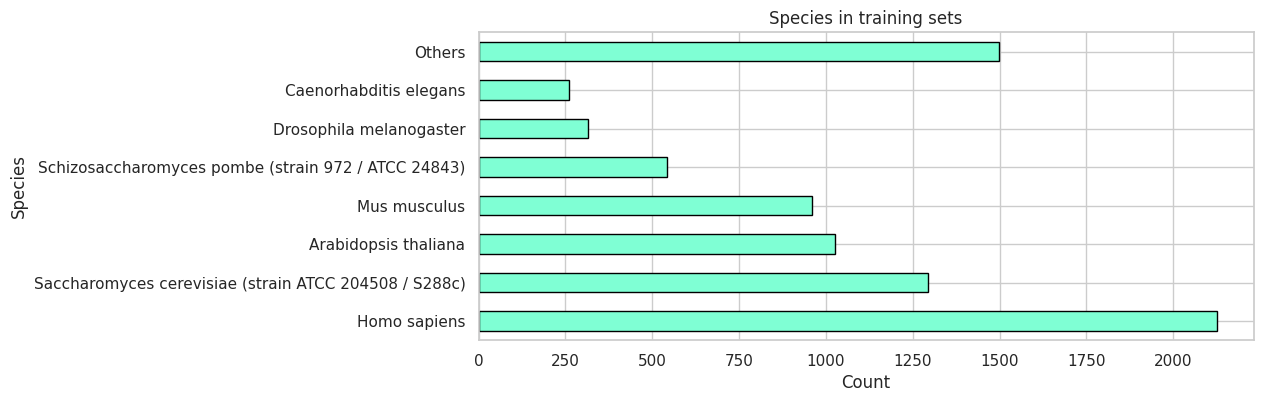

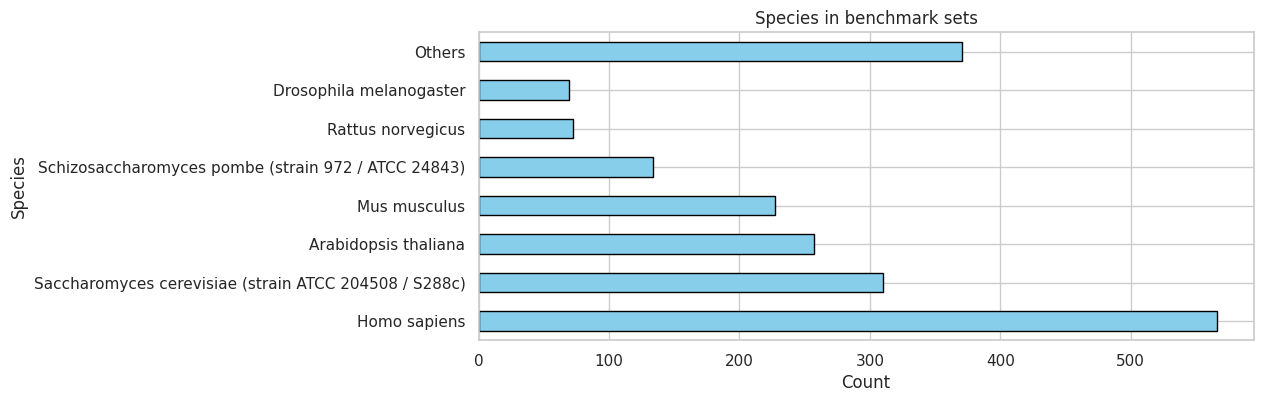

In [ ]:
# Plot the bar plot

# First
fig, ax = plt.subplots(figsize=(10,4))
result_train.plot(kind='barh', color='#7FFFD4', edgecolor='black', ax=ax)
ax.set_title('Species in training sets')
ax.set_xlabel('Count')
ax.set_ylabel('Species')

fig.savefig(os.path.join(output_dir, "barplot_species_train.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)

# Second
fig, ax = plt.subplots(figsize=(10,4))
result_bench.plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)
ax.set_title('Species in benchmark sets')
ax.set_xlabel('Count')
ax.set_ylabel('Species')

fig.savefig(os.path.join(output_dir, "barplot_species_bench.png"), dpi=300, bbox_inches="tight")
plt.show()

plt.close(fig)

Both datasets are dominated by Homo sapiens and other well-known model organisms, with similar distributions and minor species grouped under “Others”.

## Cleavage-Site Motif Analysis:

> This analysis focuses on the sequence region around the signal peptide cleavage site.  
> The goal is to identify conserved patterns that combine the end of the hydrophobic stretch with specific residues near the cut position.  

By generating **sequence logos**, it becomes possible to:  
- Visualize amino acid conservation across positions  
- Detect recurring motifs characteristic of signal peptide processing  
- Provide features that can support predictive models  


In [ ]:
with open('positive.fasta', 'r') as read:
  with open('train_logo.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = pos_train.query("seq_id == @line")['SP cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[end-13:end+2], file=write)
  write.close
read.close

with open('positive.fasta', 'r') as read:
  with open('bench_logo.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = pos_bench.query("seq_id == @line")['SP cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[end-13:end+2], file=write)
  write.close
read.close

<function TextIOWrapper.close()>

In [ ]:
aa_list = ['M', 'A', 'G', 'L', 'S', 'R', 'T', 'V', 'P', 'K', 'Y', 'I', 'F', 'Q', 'C', 'E', 'W', 'D', 'N', 'H','X']


With the `logomaker` library, a frequency matrix is built from aligned sequences and visualized as a sequence logo.  




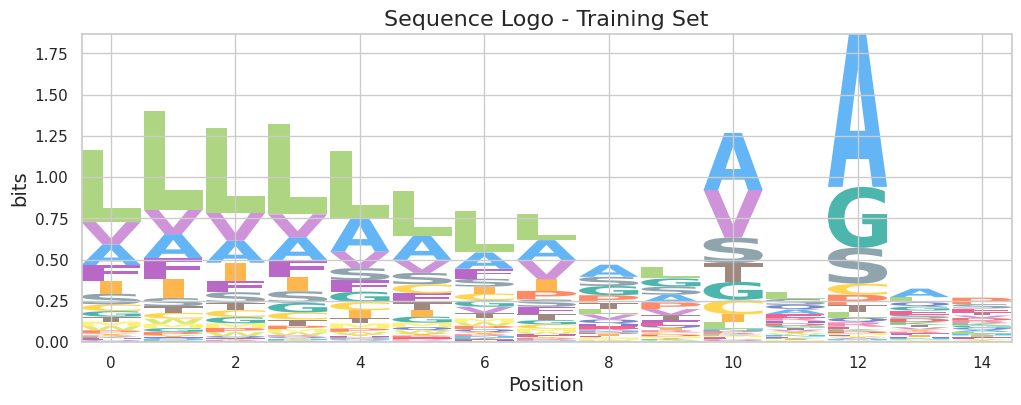

In [ ]:
import logomaker
import warnings

with open("train_logo.seq") as f:
    sequences = [line.strip() for line in f if line.strip()]

# Create a frequency matrix from the sequences
counts_mat = logomaker.alignment_to_matrix(sequences=sequences, to_type='information')

# Draw the sequence logo
aa_colors = {
    'A':'#64B5F6', 'C':'#FFD54F', 'D':'#E57373', 'E':'#F06292',
    'F':'#BA68C8', 'G':'#4DB6AC', 'H':'#9575CD', 'I':'#FFB74D',
    'K':'#81C784', 'L':'#AED581', 'M':'#FFF176', 'N':'#4FC3F7',
    'P':'#FF8A65', 'Q':'#7986CB', 'R':'#F48FB1', 'S':'#90A4AE',
    'T':'#A1887F', 'V':'#CE93D8', 'W':'#DCE775', 'Y':'#FBC02D',
    'X':'#000000' # X for unknow residues
}

fig, ax = plt.subplots(figsize=(12, 4))

logo = logomaker.Logo(
    counts_mat,
    ax=ax,                # <- tell Logomaker which axis to use for plotting
    shade_below=.5,
    fade_below=.5,
    color_scheme=aa_colors
)

ax.set_title("Sequence Logo - Training Set", fontsize=16)
ax.set_ylabel("bits", fontsize=14)
ax.set_xlabel("Position", fontsize=14)



fig.savefig(os.path.join(output_dir, "seq_logo_train.png"), dpi=300, bbox_inches="tight")
plt.show()

plt.close(fig)

The sequence logo reveals a clear hydrophobic core rich in leucine, followed by the characteristic AXA motif that marks the cleavage region.

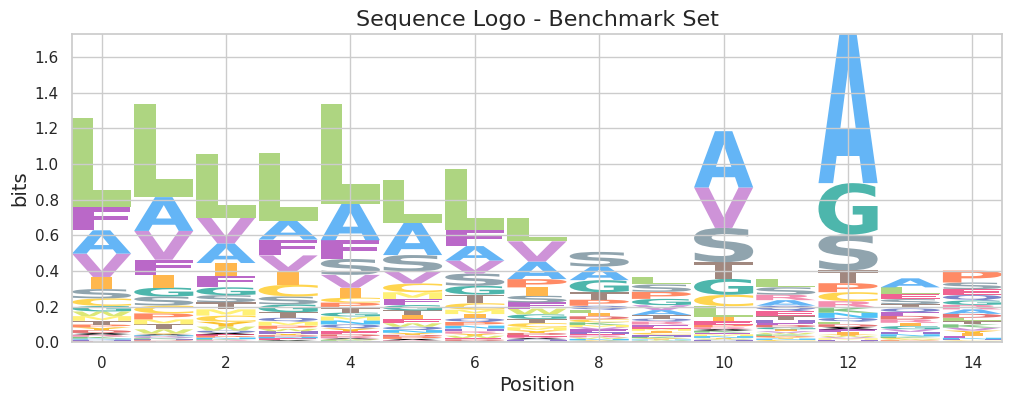

In [ ]:
with open("bench_logo.seq") as f:
    sequences = [line.strip() for line in f if line.strip()]

# Create a frequency matrix from the sequences
counts_mat = logomaker.alignment_to_matrix(sequences=sequences, to_type='information')

# Draw the sequence logo
aa_colors = {
    'A':'#64B5F6', 'C':'#FFD54F', 'D':'#E57373', 'E':'#F06292',
    'F':'#BA68C8', 'G':'#4DB6AC', 'H':'#9575CD', 'I':'#FFB74D',
    'K':'#81C784', 'L':'#AED581', 'M':'#FFF176', 'N':'#4FC3F7',
    'P':'#FF8A65', 'Q':'#7986CB', 'R':'#F48FB1', 'S':'#90A4AE',
    'T':'#A1887F', 'V':'#CE93D8', 'W':'#DCE775', 'Y':'#FBC02D',
    'X': '#000000'  # X for unknow residues
}

fig, ax = plt.subplots(figsize=(12, 4))

logo = logomaker.Logo(
    counts_mat,
    ax=ax,                # <- tell Logomaker which axis to use for plotting
    shade_below=.5,
    fade_below=.5,
    color_scheme=aa_colors
)

ax.set_title("Sequence Logo - Benchmark Set", fontsize=16)
ax.set_ylabel("bits", fontsize=14)
ax.set_xlabel("Position", fontsize=14)

fig.savefig(os.path.join(output_dir, "seq_logo_bench.png"), dpi=300, bbox_inches="tight")
plt.show()

plt.close(fig)

The logo emphasizes a sharper conservation around the AXA motif, which stands out more clearly at the cleavage site, reflecting the reduced sequence diversity in this subset.